In [ ]:
!pip install geopandas
!pip install contextily
import geopandas
import contextily as ctx

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 15.4 MB 29.8 MB/s 
     |████████████████████████████████| 6.3 MB 20.8 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


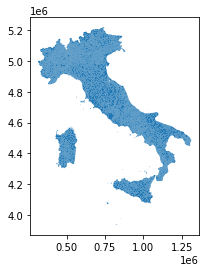

In [ ]:
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/quartieriMil/Limiti01012021_g/Com01012021_g')
comuni.plot()

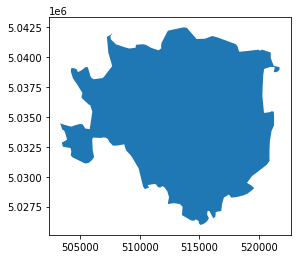

In [ ]:
milano = comuni[comuni.COMUNE.str.contains('Milano')]
milano.plot()

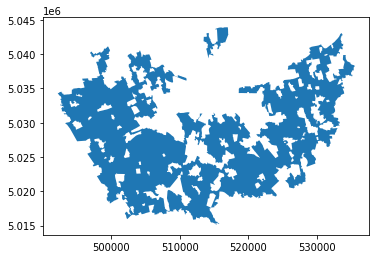

In [ ]:
parchi = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas/Parchi_regionali_e_nazionali_polygon.zip')
parchiMil = parchi[parchi.intersects(milano.geometry.squeeze())]
parchiMil.plot()

In [ ]:
comuniParchi = comuni[comuni.intersects(parchiMil.unary_union)]
comuniParchi

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
1811,1,3,15,215,215,15002,015002,Abbiategrasso,None,0,43048.321516,4.777153e+07,"POLYGON ((493446.898 5029705.643, 493602.897 5..."
1812,1,3,15,215,215,15005,015005,Albairate,None,0,18919.829233,1.567417e+07,"POLYGON ((495595.883 5032525.624, 495661.881 5..."
1815,1,3,15,215,215,15010,015010,Arluno,None,0,18646.960825,1.278364e+07,"POLYGON ((496562.280 5041533.478, 496401.277 5..."
1816,1,3,15,215,215,15011,015011,Assago,None,0,12853.544196,8.397610e+06,"POLYGON ((511386.603 5029333.275, 511518.968 5..."
1817,1,3,15,215,215,15012,015012,Bareggio,None,0,15924.405593,1.130249e+07,"POLYGON ((499326.672 5038880.244, 499885.260 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,1,3,98,0,98,98020,098020,Comazzo,None,0,22343.534930,1.277192e+07,"POLYGON ((534210.409 5035224.602, 534551.968 5..."
7484,1,3,98,0,98,98039,098039,Merlino,None,0,18053.583011,1.039029e+07,"POLYGON ((534698.954 5033625.792, 534731.476 5..."
7486,1,3,98,0,98,98041,098041,Mulazzano,None,0,22643.863100,1.529437e+07,"POLYGON ((530678.622 5027337.660, 530960.619 5..."
7500,1,3,98,0,98,98055,098055,Sordio,None,0,6681.722797,2.603890e+06,"POLYGON ((529834.629 5021137.707, 530206.624 5..."


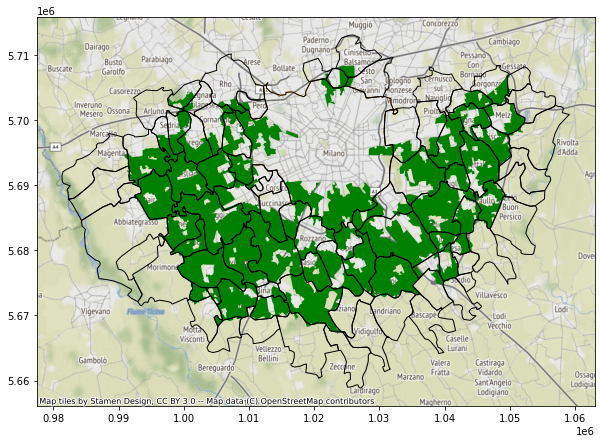

In [ ]:
ax = milano.to_crs(epsg=3857).plot(facecolor='none',edgecolor='orange',figsize=(10,10))
parchiMil.to_crs(epsg=3857).plot(ax=ax,facecolor='g')
comuniParchi.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

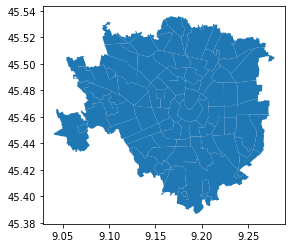

In [ ]:
districts = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas/ds964_nil_wm')
districts.crs
districts.plot()

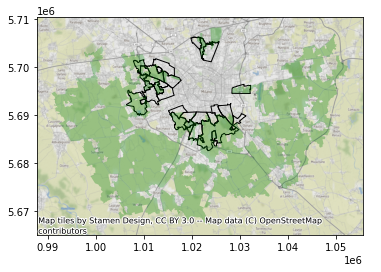

In [ ]:
districtsParchi = districts[districts.intersects(parchiMil.to_crs(epsg=4326).unary_union)]
ax = districtsParchi.to_crs(epsg=3857).plot(facecolor='none',edgecolor='k')
parchiMil.to_crs(epsg=3857).plot(alpha=.3,facecolor='g',ax=ax)
ctx.add_basemap(ax)

Adamello


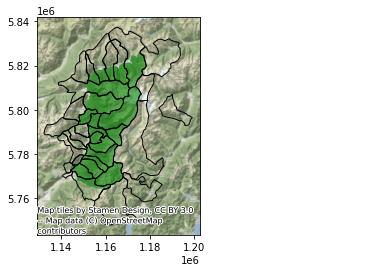

In [ ]:
parco = input()
ax = parchi[parchi.COD_NOME.str.contains(parco)].to_crs(epsg=3857).plot(facecolor='green',alpha=.6)
comuni[comuni.intersects(parchi[parchi.COD_NOME.str.contains(parco)].geometry.squeeze())].to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

In [ ]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/quartieriMil/Limiti01012021_g/ProvCM01012021_g')
province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [ ]:
provinceParco = province[province.intersects(parchi[parchi.COD_NOME.str.contains(parco)].geometry.squeeze())]
provinceParco

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
16,1,3,17,0,17,Brescia,-,Brescia,BS,Provincia,446387.375203,4.787545e+09,"POLYGON ((615296.024 5132340.876, 615374.024 5..."
21,2,4,22,0,22,Trento,-,Trento,TN,Provincia autonoma,594758.785501,6.208170e+09,"POLYGON ((716676.337 5153931.623, 716029.354 5..."


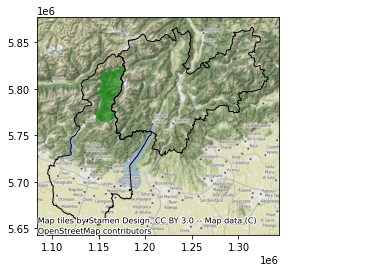

In [ ]:
ax = parchi[parchi.COD_NOME.str.contains(parco)].to_crs(epsg=3857).plot(facecolor='green',alpha=.6)
provinceParco.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

Milano
20    Parco Nord Milano
21     Parco Sud Milano
Name: NOME, dtype: object


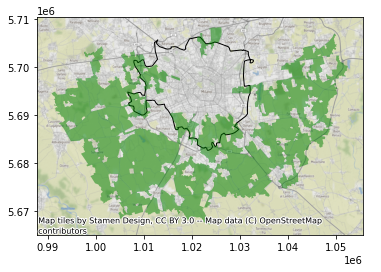

In [ ]:
comune = input()
if comune not in comuni.COMUNE.tolist():
  print('Parco non presente in Lombardia o digitato incorrettamente')
else:
  parchiComune = parchi[parchi.intersects(comuni[comuni.COMUNE.str.contains(comune)].geometry.squeeze())]

  ax = comuni[comuni.COMUNE.str.contains(comune)].to_crs(epsg=3857).plot(edgecolor='k',facecolor='none')
  parchiComune.to_crs(epsg=3857).plot(facecolor='green',alpha=.5,ax=ax)
  print(parchiComune.NOME)
  ctx.add_basemap(ax)

Milano
8            Parco Adda Nord
9     Parco Valle del Ticino
18        Parco delle Groane
20         Parco Nord Milano
21          Parco Sud Milano
22            Parco Adda Sud
24          Parco Sud Milano
Name: NOME, dtype: object


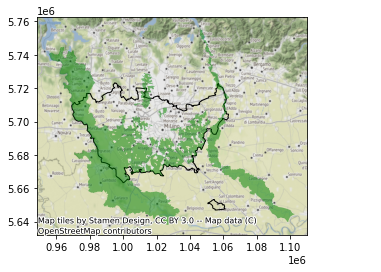

In [ ]:
provincia = input()
if provincia not in province.DEN_UTS.tolist():
  print('Parco non presente in Lombardia o digitato incorrettamente')
else:
  parchiProvincia = parchi[parchi.intersects(province[province.DEN_UTS.str.contains(provincia)].geometry.squeeze())]

  ax = province[province.DEN_UTS.str.contains(provincia)].to_crs(epsg=3857).plot(edgecolor='k',facecolor='none')
  parchiProvincia.to_crs(epsg=3857).plot(facecolor='green',alpha=.5,ax=ax)
  print(parchiProvincia.NOME)
  ctx.add_basemap(ax)